# Importing and exporting data in Python

In [20]:
#Importing Pandas module
import pandas as pd

In [21]:
#URL where the data is located
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv'

In [22]:
#Read csv - there are similar functions for other formats
df = pd.read_csv(url, header = None)

In [7]:
#Check first couple of rows
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
#Check bottom rows
df.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


### Adding headers

In [23]:
#The table is missing headers, these are the ones we'll add to it
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cilinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

In [24]:
df.columns = headers 

In [25]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


### Exporting a pandas data frame to CSV

In [12]:
#Getting the current working directory
import os
os.getcwd() 

'/home/claudia/Code/python-data-analysis'

In [30]:
#The path includes the file name that you want to write to
path = "/home/claudia/Code/python-code/used-cars-data.csv"

In [31]:
df.to_csv(path)

# Getting started analyzing data

### Basic insights of the dataset - data types

In [15]:
#Checking the data type of all columns with the method dtypes
#Note that bore is the dimension of an engine, so it shouldn't be an object
#(a string), but a numerical type.
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cilinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Check the statistical summary

In [16]:
#Check the distribution of data for each column - quick stats
#Look for extreme outliers and large deviations
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [17]:
#By default, the describe() method skips columns that are not numeric 
#To include the object columns type:
df.describe(include="all")

#unique - counts distinct objects in column
#top - most frequently occurring object
#freq - # of times the top object appears

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [18]:
#The  .info() method provides a concise summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cilinders   205 non-null    object 
 16  engine-size        205 non

## Pre-processing Data in Python

Converting or mapping data from the initial "raw" form into another format, in order to prepare the data for further analysis. 
Better known as data cleaning or data wrangling.

Learning objectives:

* Identify and handle missing values - empty data entry.
* Data formating - standardize the values in the same format or unit, or convention.
* Data normalization - different columns of numerical data may have very different ranges and direct comparison is not meaningful. Normalization allows to bring data into a similar range for a more useful comparison. Some techniques: centering/scaling.
* Data binning - binning creates bigger categories from a set of numerical values / useful for comparison.
* Turning categorical values to numeric variables - makes modeling easier.

In [34]:
#Accessing a column in a data frame - each column is a pandas series
df['symboling']

0      5
1      5
2      3
3      4
4      4
      ..
200    1
201    1
202    1
203    1
204    1
Name: symboling, Length: 205, dtype: int64

In [33]:
#Manipulating dataframes - add 1 to each entry of a column
#Note this won't print the change
df['symboling'] = df['symboling']+1

### Dealing with missing values in Python

* Missing value - When no data value is stored for a particular observation. 
* They usually appear as "?", "N/A", "NaN", 0 or just a blank cell.

Ways to deal with missing values

1. **Check with the data collection source**
Check if the person or group that collected the data can go back and find what the actual value should be. 

2. **Drop the missing values**
Drop the whole variable or just the single data entry with the missing value. *Usually dropping the particular entry is best*

3. **Replace the missing values** 
Better since no data is wasted, however, less accurate since we're guessing.
    * Replace data with the average of similar datapoints (the average of the entire variable. 
    * Replace it by frequency - when the value cannot be averaged (e.g. categorical variables), use the mode (the most frequent value).
    * Replace it based on other functions.
    
4. **Leave it as missing data**

#### Dropping missing values

In [35]:
#dropna() method allows you to choose to drop rows or columns that 
#contain missing values like NaN

df.dropna()
#Note that the example doesn't change the data frame, use inplace=True for that

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,5,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,5,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,3,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,4,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
#specify axis = 0 to drop the entire row
#or axis = 1 to drop the entire column
#inplace = True allows the modification to be done on the data set directly, 
#writes the result back into the df
df.dropna(subset=["price"], axis=0, inplace=True)

#Equivalent to:
# df = df.dropna(subset=["price"], axis=0)

#### Replacing missing values

In [43]:
#Replacing missing values with the mean
#To calculate the mean I need the column to be numeric
df["normalized-losses"]=pd.to_numeric(df["normalized-losses"], errors='coerce')

In [46]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cilinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [48]:
#Calculate the mean
mean = df["normalized-losses"].mean()
mean

122.0

In [51]:
#Replacing missing values
import numpy as np

df["normalized-losses"].replace(np.nan, mean)

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

## Data formatting in Python

**Data formatting**
* Data is usually collected from different places and stored in different formats
* Bringing data into a common standard of expression allows users to make meaningful comparisons

Clean the data, make it more clear, easy to aggregate and compare.

In [53]:
#Example converting mpg to the same units (mpg and L/100km to the same unit)
df["city-mpg"] = 235/df["city-mpg"]

In [54]:
#Rename the column
df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)

In [55]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,5,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,5,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500


#### Incorrect data type

In [57]:
#The wrong data type is assign to a feature
#In this case the price is a string
df["price"].tail(2)

203    22470
204    22625
Name: price, dtype: object

In [71]:
#The price column has NaNs which will be a problem when using as.type
#In this case is better to use to_numeric to deal with the null values
print (df[ pd.to_numeric(df['price'], errors='coerce').isnull()])

     symboling  normalized-losses     make fuel-type aspiration num-of-doors  \
9            2                NaN     audi       gas      turbo          two   
44           3                NaN    isuzu       gas        std          two   
45           2                NaN    isuzu       gas        std         four   
129          3                NaN  porsche       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
9    hatchback          4wd           front        99.5  ...          131   
44       sedan          fwd           front        94.5  ...           90   
45       sedan          fwd           front        94.5  ...           90   
129  hatchback          rwd           front        98.4  ...          203   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
9           mpfi  3.13    3.40               7.0        160      5500   
44          2bbl  3.03    3.11               9.6         70      54

In [74]:
#To convert data types
#df[["price"]] = df[["price"]].astype(int)
#df.astype({'price': 'int32'}).dtypes
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].dtypes

dtype('float64')

## Data normalization in Python

### Definition

Uniform the feature value with different range to allow a fair comparison.

E.g. comparing length, width and height.
Check the scale: 
length ranges from [150, 250] - large
width [50-100] - small
height [50-100] - small

Another example, I have a dataset with age and income

<ins>Not normalized</ins>:
* Age and income in different range, [0-100] and [0 - 20,000]
* Hard to compare
* Income will influence the result more, income is about 1000 times larger than age

Let's say we're doing a linear regression, the data biases the linear regression model to weigh income more heavily than age - to avoid this we can normalize these two variables into values that range from zero to one.

<ins>Normalized</ins>:
* Similar value range
* Similar intrinsic influence on analytical model


### Methods for normalizing data

1. **Simple feature scaling**

*xnew = xold/xmax*   - makes the values range from 0 to 1

2. **Min-Max**

*xnew = (xold-xmin)/(xman-xmin)*   - makes the values range from 0 to 1

3. **Z-score or standard score**

*xnew = (xold-mean)/standard-deviation*   - makes the value vary from approx -3 to +3

#### Simple feature scaling

In [77]:
df["length"] = df["length"]/df["length"].max()

#### Min-Max method

In [78]:
df["length"] = (df["length"] - df["length"].min())/(df["length"].max() - df["length"].min())

#### Z-score method

In [79]:
df["length"] = (df["length"] - df["length"].mean())/df["length"].std()

## Binning in Python

* Binning: Grouping values into bins. 
* Converts numeric into categorical variables.
* Sometimes binning can improve the accuracy of the predictive models.
* It can also be used to group a set of numerical values into a smaller number of bins - let's you have a better representation of the distribution.

In [83]:
#E.g. binning price into three groups: low, medium, and high
#We need 4 numbers as dividers that are equal distance apart
#Use the numpy function "linspace" to return the array bins that
#contains 4 equally spaced numbers over the specified interval.
bins = np.linspace(min(df["price"]), max(df["price"]), 4)
bins

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [84]:
#Create a list
group_names = ["low", "medium", "high"]

In [86]:
#The pandas function cut segments and sorts the data into bins
df["price-binned"] = pd.cut(df["price"], bins, labels = group_names, include_lowest = True)

#### Visualizing binned data

In [87]:
#Make a histogram

## Turning categorical variables into quantitative variables in Python

Problem:

* Most statistical models cannot take in the objects/strings as input - model training only takes numbers as inputs.

Solution:

* Add dummy variables for each unique category
* Assign 0 or 1 in each category - this technique is often called **one-hot encoding**

In [90]:
#Convert categorical variables to dummy variables (0 or 1)
#The fuel column has only gas and diesel values

#pd.get_dummies(df["fuel"]) gets the fuel column and creates a new 
#table with the gas and diesel with the correct distribution of 0 and 1

# Exploratory Data Analysis

Preliminary step to:
* Summarize main characteristics of the data
* Gain better understanding of the data set
* Uncover relationships between variables
* Extract important variables

Question: 
*What are the characteristics that have the most impact on the car price?*

### Descriptive Statistics

* Describe basic features of data
* Give short summaries about the sample and measures of the data

In [91]:
#Use the pandas describe() function to get an idea of the distribution
# of the data
#By default NaN values are excluded
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-L/100km,highway-mpg,price
count,205.000000,164.000000,205.000000,2.050000e+02,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,2.834146,122.000000,98.756585,1.802352e-15,65.907805,53.724878,2555.565854,126.907317,10.142537,9.949525,30.751220,13207.129353
std,1.245307,35.442168,6.021776,1.000000e+00,2.145204,2.443522,520.680204,41.642693,3.972040,2.573104,6.886443,7947.066342
min,0.000000,65.000000,86.600000,-2.670706e+00,60.300000,47.800000,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,2.000000,94.000000,94.500000,-6.281176e-01,64.100000,52.000000,2145.000000,97.000000,8.600000,7.833333,25.000000,7775.000000
50%,3.000000,115.000000,97.000000,-6.883752e-02,65.500000,54.100000,2414.000000,120.000000,9.000000,9.791667,30.000000,10295.000000
75%,4.000000,150.000000,102.400000,7.336078e-01,66.900000,55.500000,2935.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,5.000000,256.000000,120.900000,2.759985e+00,72.300000,59.800000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


In [93]:
#In case you have categorical variables that can be divided up into
#different categories or groups and have discrete values.
#Summarize the categorical data using the value_counts() method
drive_wheels_count = df["drive-wheels"].value_counts()
drive_wheels_count

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [99]:
#Rename the drive_wheels_count column
drive_wheels_count.rename({"drive-wheels":"value_count"}, inplace = True)
drive_wheels_count

drive-wheels
fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

#### Box Plots

- Great way to visualize numeric data. 
- You can check the median (which represents where the middle data point is).
- The upper quartile (75th percentile).
- The lower quartile (25th percentile).
- The data between the upper and lower quartile represents the interquartile range, IQR.
- You can easily spor outliers and also see the distribution and skewness of the data.

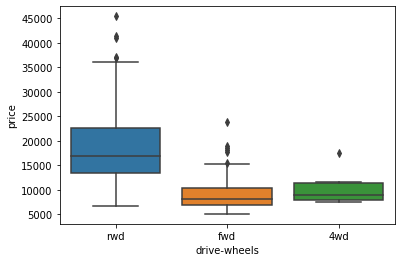

In [102]:
import seaborn as sns
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

#### Scatter Plots

1. Each observation represented as a point.
2. Shows the relationship between two variables.
    - The **predictor/independent variable**, variable on the x-axis, is the variable you are using to predict an outcome.
    - The **target variable/dependent**, variable on the y-axis, is the one you are trying to predict
    
Could engine-size possibly predict the price of a car?
*Price is the target variable.*

Text(0, 0.5, 'Price')

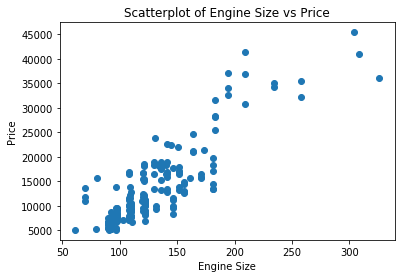

In [106]:
#Label axis and write the correct titles
import matplotlib.pyplot as plt

y = df["price"]
x = df["engine-size"]

plt.scatter(x,y)
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")